In [1]:
import pandas as pd

In [2]:
pcp = pd.read_csv("data/protonet_cp+_auroc_result_summary.csv")
# Extract the AUC values (ignore the +/- part)
for col in ['8', '16', '32', '64', '96']:
    pcp[col] = pcp[col].str.split(r'\+\/\-').str[0].astype(float)

pcp

,ASSAY_ID,assay_chembl_id,8,16,32,64,96
0,688267,CHEMBL1614530,0.53,0.57,0.60,0.65,0.67
1,600886,CHEMBL1040692,0.53,0.56,0.57,0.61,0.65
2,737826,CHEMBL1741325,0.58,0.64,0.66,0.68,0.70
3,737824_1,CHEMBL1741323,0.60,0.64,0.67,0.70,0.70
4,737825,CHEMBL1741324,0.56,0.55,0.57,0.59,0.60
5,1495405,CHEMBL3562136,0.59,0.64,0.71,0.74,0.74
6,737053,CHEMBL1738598,0.50,0.50,0.53,0.54,0.58
7,737400,CHEMBL1738606,0.54,0.57,0.59,0.63,0.66
8,736947,CHEMBL1738312,0.54,0.53,0.58,0.57,0.58
9,752347,CHEMBL1794311,0.60,0.70,0.75,0.77,0.77


In [3]:
cc = pd.read_csv("auc_scores_across_folds.csv")
cc

,Task,AUC_C
0,688267,0.600979
1,600886,0.525034
2,737826,0.535589
3,737824_1,0.557364
4,737825,0.570937
5,1495405,0.752043
6,737053,0.428189
7,737400,0.574029
8,736947,0.646930
9,752347,0.618600


In [4]:
cc_r = pd.read_csv("auc_scores_r_across_folds.csv")
cc_r

,Task,AUC_r
0,688267,0.399021
1,600886,0.474966
2,737826,0.464411
3,737824_1,0.442636
4,737825,0.429063
5,1495405,0.247957
6,737053,0.571811
7,737400,0.425971
8,736947,0.353070
9,752347,0.381400


In [5]:
# Merge with metrics_df
merged_df = cc.copy()
merged_df = merged_df.rename(columns={'Task': 'ASSAY_ID'})
merged_df = pd.merge(merged_df, pcp, on='ASSAY_ID', how='inner')
merged_df = pd.merge(merged_df, cc_r, left_on='ASSAY_ID', right_on='Task', how='inner')
merged_df


,ASSAY_ID,AUC_C,assay_chembl_id,8,16,32,64,96,Task,AUC_r
0,688267,0.600979,CHEMBL1614530,0.53,0.57,0.60,0.65,0.67,688267,0.399021
1,600886,0.525034,CHEMBL1040692,0.53,0.56,0.57,0.61,0.65,600886,0.474966
2,737826,0.535589,CHEMBL1741325,0.58,0.64,0.66,0.68,0.70,737826,0.464411
3,737824_1,0.557364,CHEMBL1741323,0.60,0.64,0.67,0.70,0.70,737824_1,0.442636
4,737825,0.570937,CHEMBL1741324,0.56,0.55,0.57,0.59,0.60,737825,0.429063
5,1495405,0.752043,CHEMBL3562136,0.59,0.64,0.71,0.74,0.74,1495405,0.247957
6,737053,0.428189,CHEMBL1738598,0.50,0.50,0.53,0.54,0.58,737053,0.571811
7,737400,0.574029,CHEMBL1738606,0.54,0.57,0.59,0.63,0.66,737400,0.425971
8,736947,0.646930,CHEMBL1738312,0.54,0.53,0.58,0.57,0.58,736947,0.353070
9,752347,0.618600,CHEMBL1794311,0.60,0.70,0.75,0.77,0.77,752347,0.381400


In [6]:
df = merged_df

import numpy as np

# Ensure all values are at least 0.5
# df["AUC"] = np.maximum(df["AUC"], 0.5)
# df["64"] = np.maximum(df["64"], 0.5)

df

,ASSAY_ID,AUC_C,assay_chembl_id,8,16,32,64,96,Task,AUC_r
0,688267,0.600979,CHEMBL1614530,0.53,0.57,0.60,0.65,0.67,688267,0.399021
1,600886,0.525034,CHEMBL1040692,0.53,0.56,0.57,0.61,0.65,600886,0.474966
2,737826,0.535589,CHEMBL1741325,0.58,0.64,0.66,0.68,0.70,737826,0.464411
3,737824_1,0.557364,CHEMBL1741323,0.60,0.64,0.67,0.70,0.70,737824_1,0.442636
4,737825,0.570937,CHEMBL1741324,0.56,0.55,0.57,0.59,0.60,737825,0.429063
5,1495405,0.752043,CHEMBL3562136,0.59,0.64,0.71,0.74,0.74,1495405,0.247957
6,737053,0.428189,CHEMBL1738598,0.50,0.50,0.53,0.54,0.58,737053,0.571811
7,737400,0.574029,CHEMBL1738606,0.54,0.57,0.59,0.63,0.66,737400,0.425971
8,736947,0.646930,CHEMBL1738312,0.54,0.53,0.58,0.57,0.58,736947,0.353070
9,752347,0.618600,CHEMBL1794311,0.60,0.70,0.75,0.77,0.77,752347,0.381400


In [7]:
df.median()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


ASSAY_ID    752502.500000
AUC_C            0.587151
8                0.540000
16               0.575000
32               0.615000
64               0.640000
96               0.665000
Task        752502.500000
AUC_r            0.412849
dtype: float64

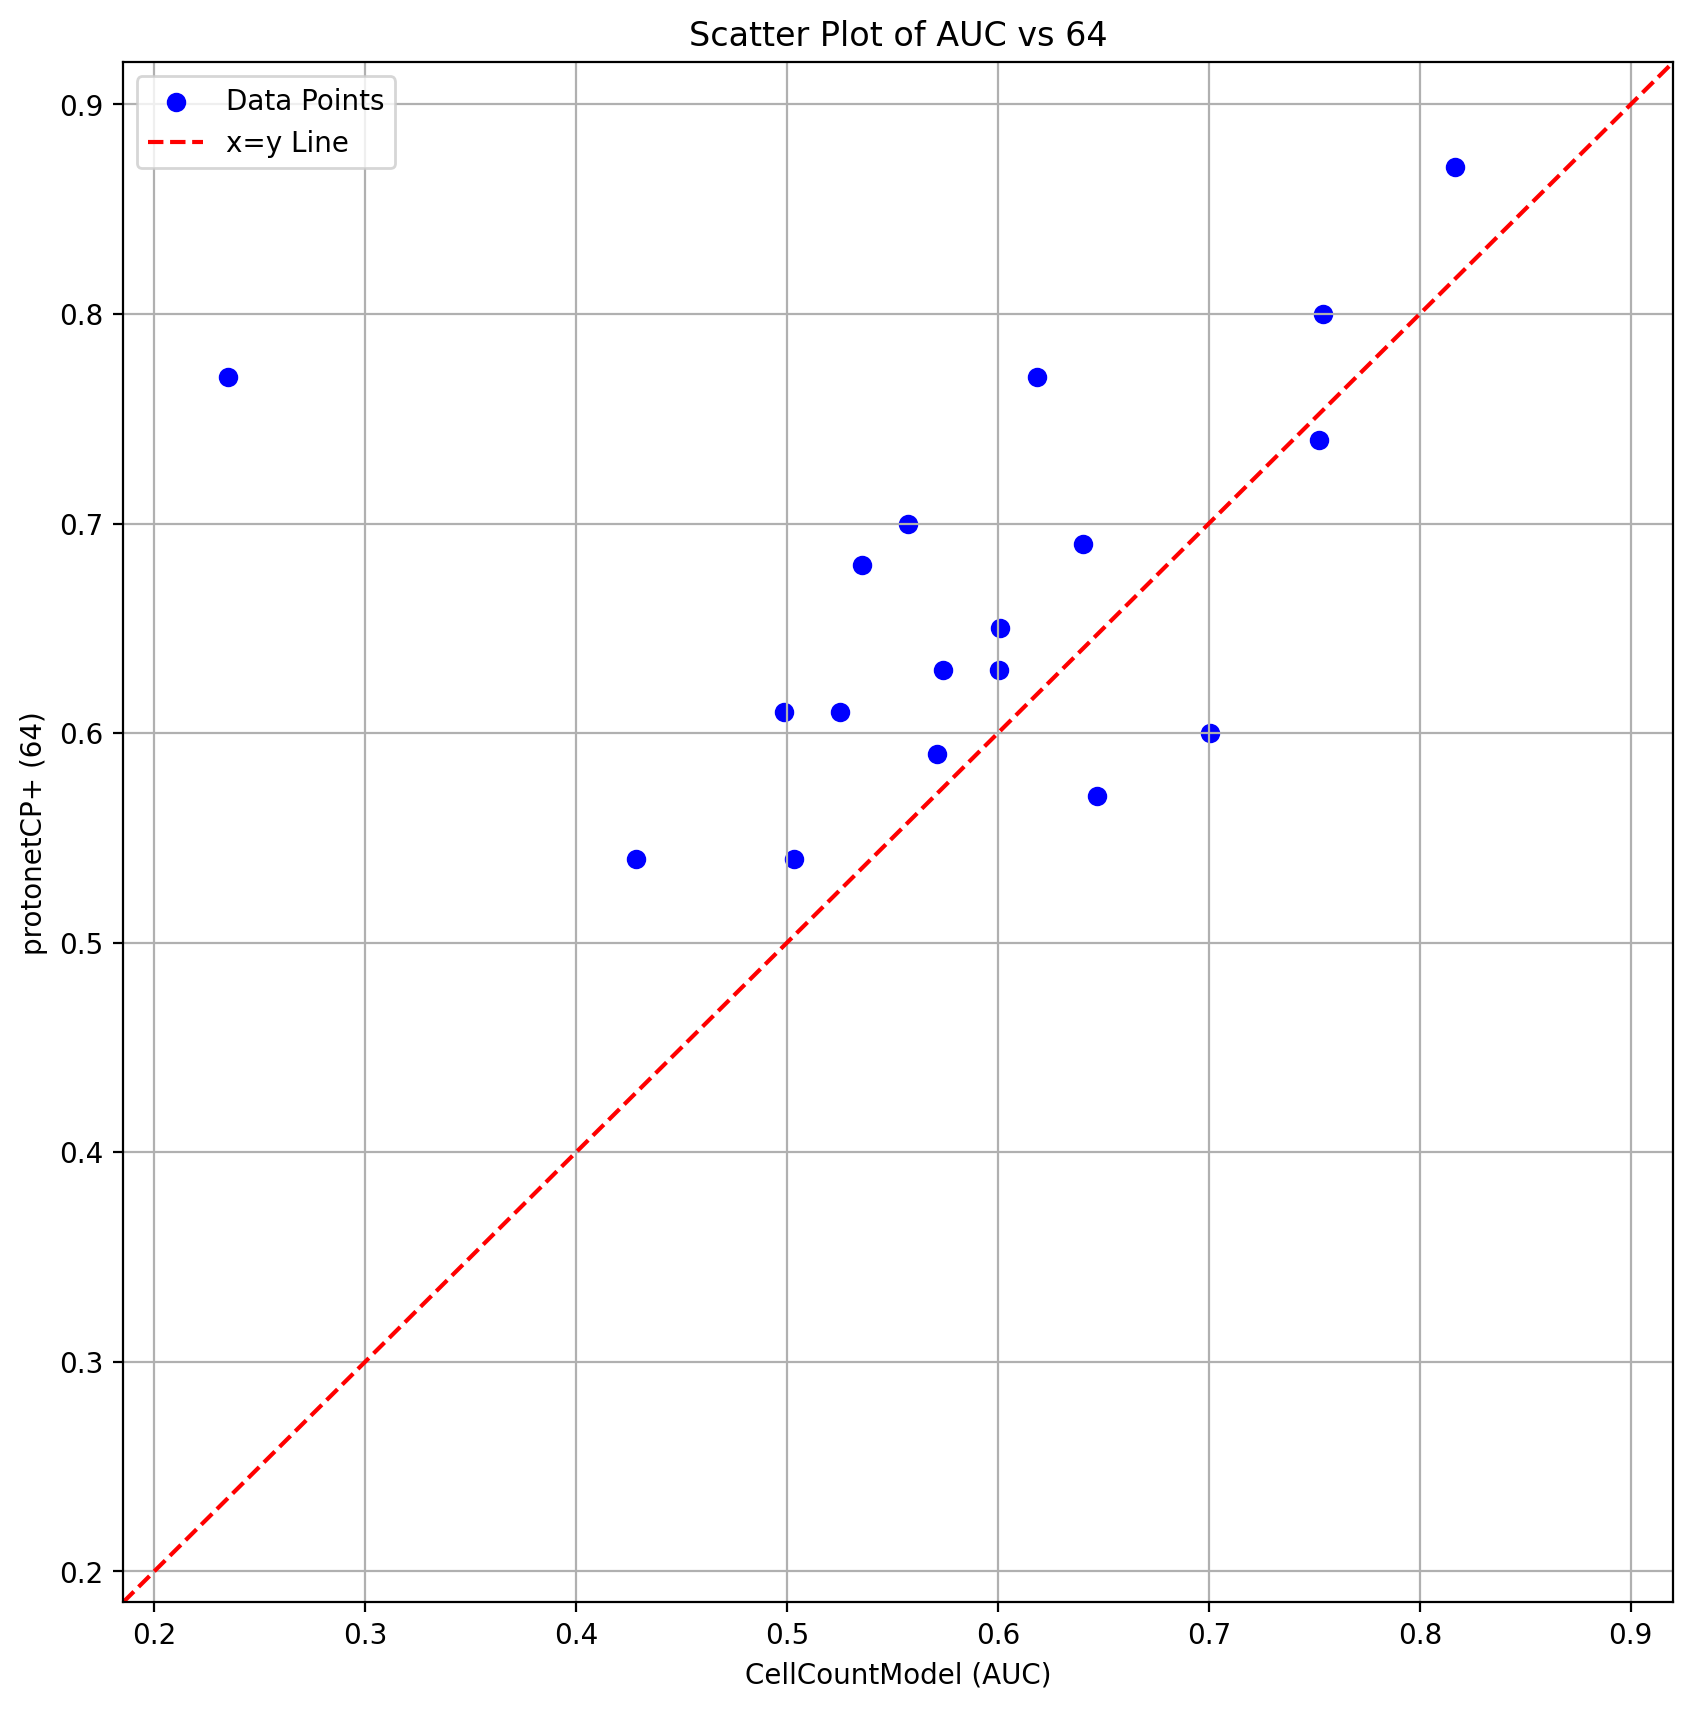

In [8]:
import matplotlib.pyplot as plt

# Create the scatter plot with higher DPI and additional enhancements
plt.figure(figsize=(10, 10), dpi=200)

# Scatter plot
plt.scatter(df["AUC_C"], df["64"], color='blue', label='Data Points')

# Plotting the x=y line through the center
max_val = max(df["AUC_C"].max()+0.05, df["64"].max()+0.05)
min_val = min(df["AUC_C"].min()-0.05, df["64"].min()-0.05)
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='x=y Line')

# Adding titles and labels
plt.title('Scatter Plot of AUC vs 64')
plt.xlabel('CellCountModel (AUC)')
plt.ylabel('protonetCP+ (64)')
plt.legend()

# Setting the axis limits from min to max values
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

# Adding grid and box for better readability
plt.grid(True)
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)

# Displaying the plot
plt.show()


In [34]:
merged_df

,ASSAY_ID,AUC_C,assay_chembl_id,8,16,32,64,96,Task,AUC_r
0,688267,0.600979,CHEMBL1614530,0.53,0.57,0.60,0.65,0.67,688267,0.399021
1,600886,0.525034,CHEMBL1040692,0.53,0.56,0.57,0.61,0.65,600886,0.474966
2,737826,0.535589,CHEMBL1741325,0.58,0.64,0.66,0.68,0.70,737826,0.464411
3,737824_1,0.557364,CHEMBL1741323,0.60,0.64,0.67,0.70,0.70,737824_1,0.442636
4,737825,0.570937,CHEMBL1741324,0.56,0.55,0.57,0.59,0.60,737825,0.429063
5,1495405,0.752043,CHEMBL3562136,0.59,0.64,0.71,0.74,0.74,1495405,0.247957
6,737053,0.428189,CHEMBL1738598,0.50,0.50,0.53,0.54,0.58,737053,0.571811
7,737400,0.574029,CHEMBL1738606,0.54,0.57,0.59,0.63,0.66,737400,0.425971
8,736947,0.646930,CHEMBL1738312,0.54,0.53,0.58,0.57,0.58,736947,0.353070
9,752347,0.618600,CHEMBL1794311,0.60,0.70,0.75,0.77,0.77,752347,0.381400


In [35]:
merged_df.to_csv("Ha_protonet_cellcount_results.csv", index=False)

In [13]:
len(merged_df)

18

In [14]:
# Filtering rows where both columns "64" and "AUC_C" are more than 0.5
Filteredmerged = merged_df[(merged_df["64"] >= 0.5) | (merged_df["AUC_C"] >= 0.5)]
Filteredmerged

,ASSAY_ID,AUC_C,assay_chembl_id,8,16,32,64,96,Task,AUC_r
0,688267,0.600979,CHEMBL1614530,0.53,0.57,0.60,0.65,0.67,688267,0.399021
1,600886,0.525034,CHEMBL1040692,0.53,0.56,0.57,0.61,0.65,600886,0.474966
2,737826,0.535589,CHEMBL1741325,0.58,0.64,0.66,0.68,0.70,737826,0.464411
3,737824_1,0.557364,CHEMBL1741323,0.60,0.64,0.67,0.70,0.70,737824_1,0.442636
4,737825,0.570937,CHEMBL1741324,0.56,0.55,0.57,0.59,0.60,737825,0.429063
5,1495405,0.752043,CHEMBL3562136,0.59,0.64,0.71,0.74,0.74,1495405,0.247957
6,737053,0.428189,CHEMBL1738598,0.50,0.50,0.53,0.54,0.58,737053,0.571811
7,737400,0.574029,CHEMBL1738606,0.54,0.57,0.59,0.63,0.66,737400,0.425971
8,736947,0.646930,CHEMBL1738312,0.54,0.53,0.58,0.57,0.58,736947,0.353070
9,752347,0.618600,CHEMBL1794311,0.60,0.70,0.75,0.77,0.77,752347,0.381400


In [15]:
len(Filteredmerged)

18

In [16]:
df = merged_df[["assay_chembl_id", "64", "AUC_C", "ASSAY_ID"]]
# Reshape the dataframe for seaborn
df_melt = df.melt(var_name='Model', value_name='Value',id_vars=["assay_chembl_id", "ASSAY_ID"])
df_melt = df_melt.replace({"64": "ProtonetCP+", "AUC": "Cell Counting Rule Based"})
df_melt

,assay_chembl_id,ASSAY_ID,Model,Value
0,CHEMBL1614530,688267,ProtonetCP+,0.650000
1,CHEMBL1040692,600886,ProtonetCP+,0.610000
2,CHEMBL1741325,737826,ProtonetCP+,0.680000
3,CHEMBL1741323,737824_1,ProtonetCP+,0.700000
4,CHEMBL1741324,737825,ProtonetCP+,0.590000
5,CHEMBL3562136,1495405,ProtonetCP+,0.740000
6,CHEMBL1738598,737053,ProtonetCP+,0.540000
7,CHEMBL1738606,737400,ProtonetCP+,0.630000
8,CHEMBL1738312,736947,ProtonetCP+,0.570000
9,CHEMBL1794311,752347,ProtonetCP+,0.770000


In [17]:
df_melt.groupby("Model").median()

,Value
Model,
AUC_C,0.587151
ProtonetCP+,0.640000


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Using zero_method  pratt
ProtonetCP+ v.s. AUC_C: Wilcoxon test (paired samples) with Bonferroni correction, P_val=6.491e-03 stat=2.300e+01


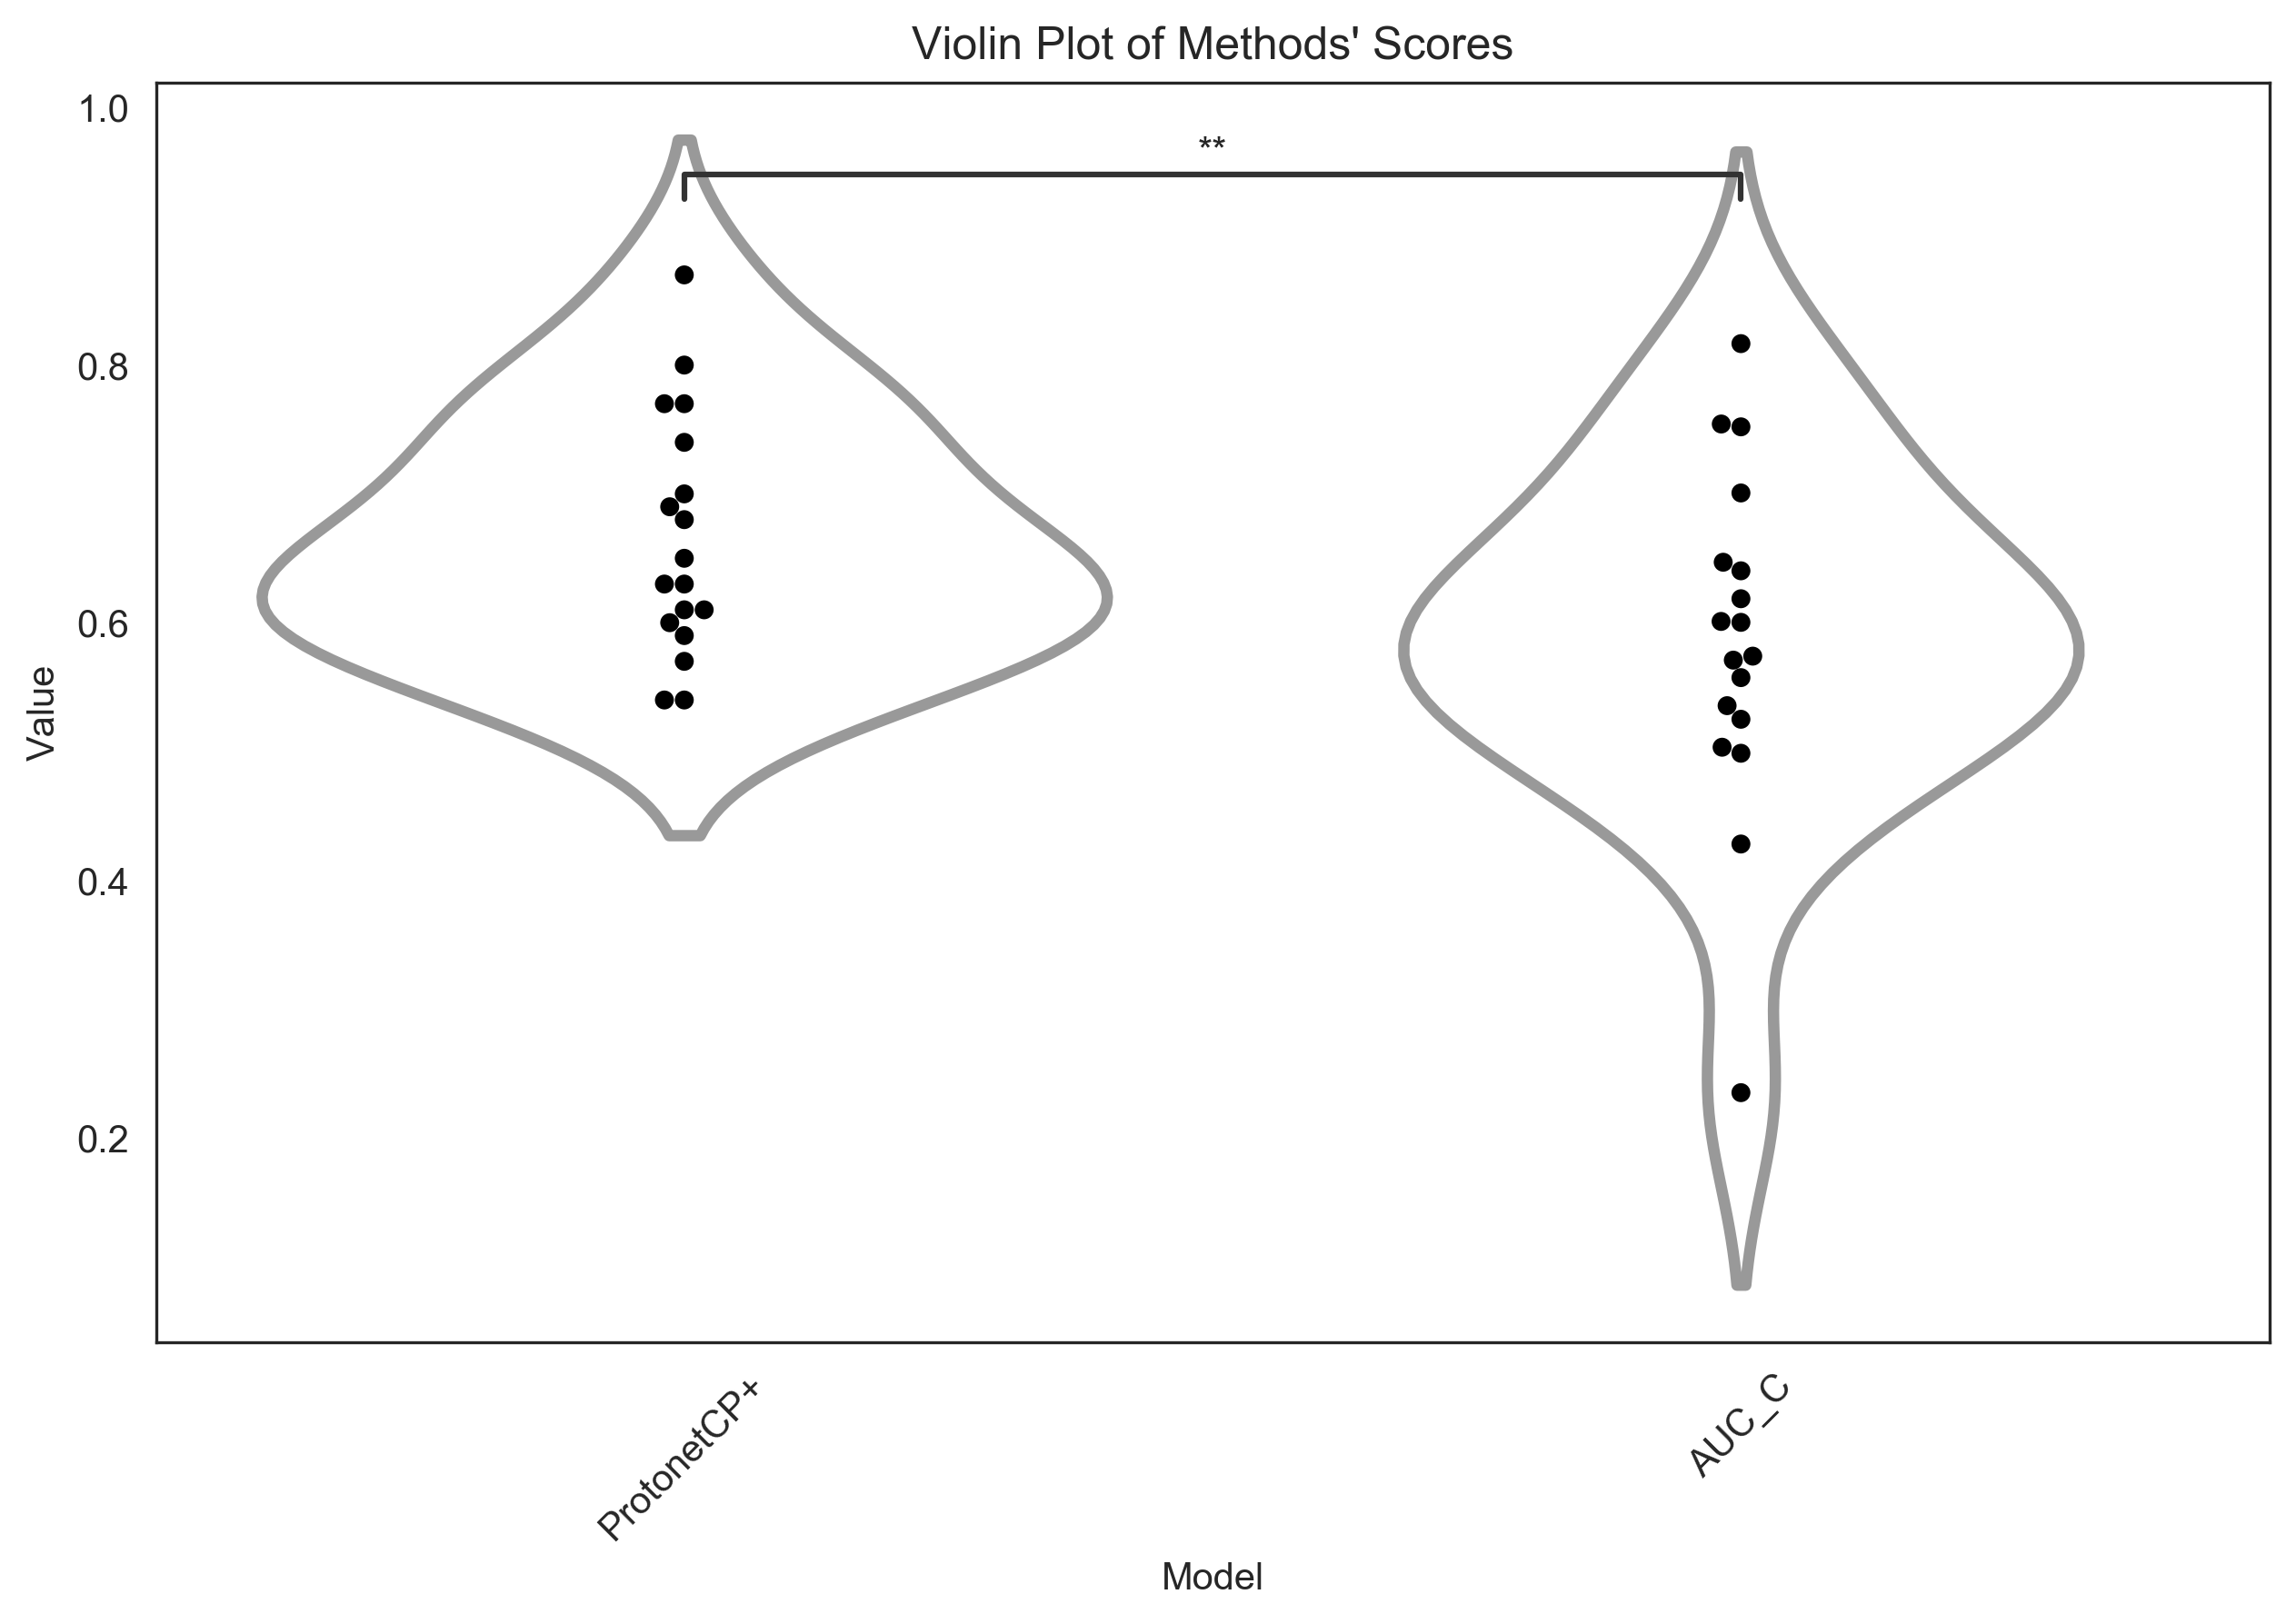

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation


melted_df_selected = df_melt[df_melt.Model.isin(['AUC_C', 'ProtonetCP+'])]


# Set plot background to white
sns.set_style("white")

# Assuming 'melted_df' is your dataframe
plt.figure(figsize=(10, 6), dpi=300)

# Create the violin plot
sns.violinplot(x="Model", y="Value", data=melted_df_selected, inner=None,  linewidth=3, color="white", edgecolor="black")

# Add the swarm plot with smaller dots
sns.swarmplot(x="Model", y="Value", data=melted_df_selected, color="k", alpha=1, size=5)

# Rotate the x-ticks for better readability
plt.xticks(rotation=45)

# Set the title of the plot
plt.title("Violin Plot of Methods' Scores")

# Add statistical annotations
add_stat_annotation(plt.gca(), data=melted_df_selected, x="Model", y="Value",
                    box_pairs=[("AUC_C", "ProtonetCP+")],
                    test='Wilcoxon', text_format='star', loc='inside', verbose=2)

# Display the plot
plt.show()


In [24]:
1-0.235170

0.76483

In [19]:
# Correcting for the one assay
melted_df_selected.at[33, "Value"] = 0.764830
melted_df_selected

,assay_chembl_id,ASSAY_ID,Model,Value
0,CHEMBL1614530,688267,ProtonetCP+,0.650000
1,CHEMBL1040692,600886,ProtonetCP+,0.610000
2,CHEMBL1741325,737826,ProtonetCP+,0.680000
3,CHEMBL1741323,737824_1,ProtonetCP+,0.700000
4,CHEMBL1741324,737825,ProtonetCP+,0.590000
5,CHEMBL3562136,1495405,ProtonetCP+,0.740000
6,CHEMBL1738598,737053,ProtonetCP+,0.540000
7,CHEMBL1738606,737400,ProtonetCP+,0.630000
8,CHEMBL1738312,736947,ProtonetCP+,0.570000
9,CHEMBL1794311,752347,ProtonetCP+,0.770000


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Using zero_method  pratt
ProtonetCP+ v.s. AUC_C: Wilcoxon test (paired samples) with Bonferroni correction, P_val=9.563e-03 stat=2.600e+01


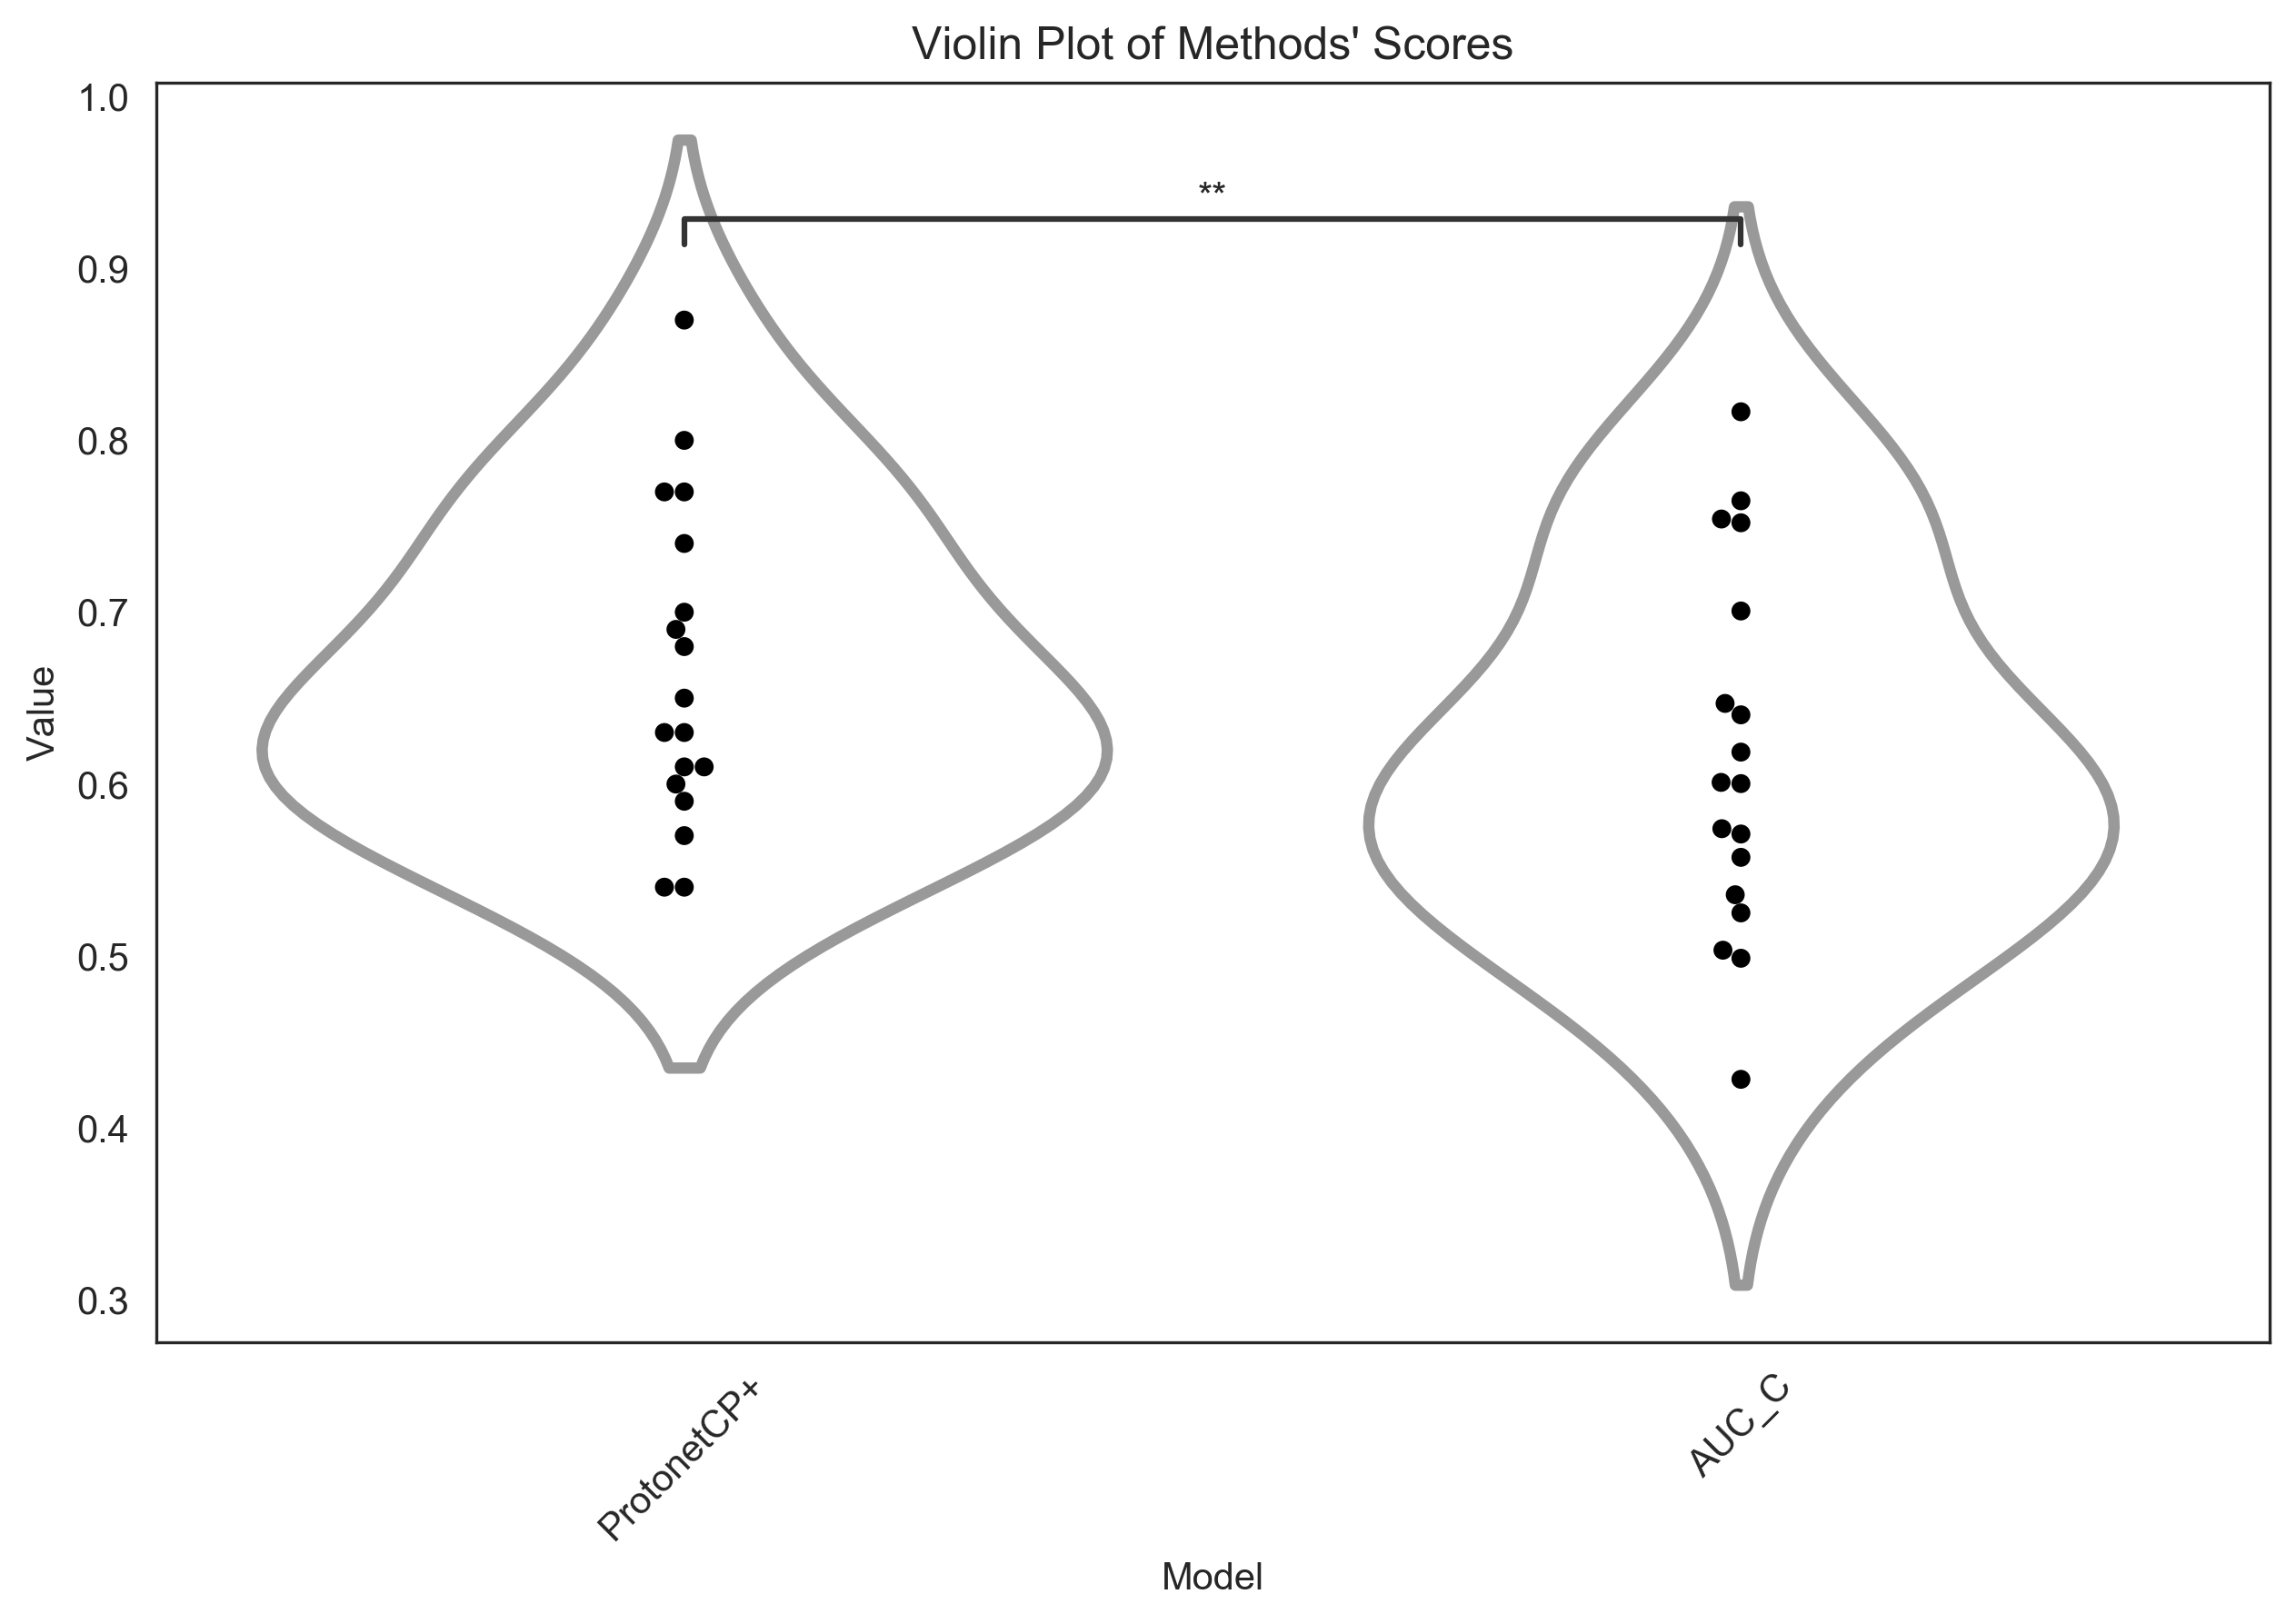

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation


melted_df_selected 


# Set plot background to white
sns.set_style("white")

# Assuming 'melted_df' is your dataframe
plt.figure(figsize=(10, 6), dpi=300)

# Create the violin plot
sns.violinplot(x="Model", y="Value", data=melted_df_selected, inner=None,  linewidth=3, color="white", edgecolor="black")

# Add the swarm plot with smaller dots
sns.swarmplot(x="Model", y="Value", data=melted_df_selected, color="k", alpha=1, size=5)

# Rotate the x-ticks for better readability
plt.xticks(rotation=45)

# Set the title of the plot
plt.title("Violin Plot of Methods' Scores")

# Add statistical annotations
add_stat_annotation(plt.gca(), data=melted_df_selected, x="Model", y="Value",
                    box_pairs=[("AUC_C", "ProtonetCP+")],
                    test='Wilcoxon', text_format='star', loc='inside', verbose=2)

# Display the plot
plt.show()


In [21]:
melted_df_selected

,assay_chembl_id,ASSAY_ID,Model,Value
0,CHEMBL1614530,688267,ProtonetCP+,0.650000
1,CHEMBL1040692,600886,ProtonetCP+,0.610000
2,CHEMBL1741325,737826,ProtonetCP+,0.680000
3,CHEMBL1741323,737824_1,ProtonetCP+,0.700000
4,CHEMBL1741324,737825,ProtonetCP+,0.590000
5,CHEMBL3562136,1495405,ProtonetCP+,0.740000
6,CHEMBL1738598,737053,ProtonetCP+,0.540000
7,CHEMBL1738606,737400,ProtonetCP+,0.630000
8,CHEMBL1738312,736947,ProtonetCP+,0.570000
9,CHEMBL1794311,752347,ProtonetCP+,0.770000


In [22]:
pivot_df = melted_df_selected.pivot(index='ASSAY_ID', columns='Model', values='Value')
# Drop any rows with missing values (if any)
pivot_df = pivot_df.dropna()
venndf = pivot_df
venndf

Model,AUC_C,ProtonetCP+
ASSAY_ID,,
1495405,0.752043,0.74
600886,0.525034,0.61
688267,0.600979,0.65
736947,0.646930,0.57
737053,0.428189,0.54
737400,0.574029,0.63
737824_1,0.557364,0.70
737825,0.570937,0.59
737826,0.535589,0.68


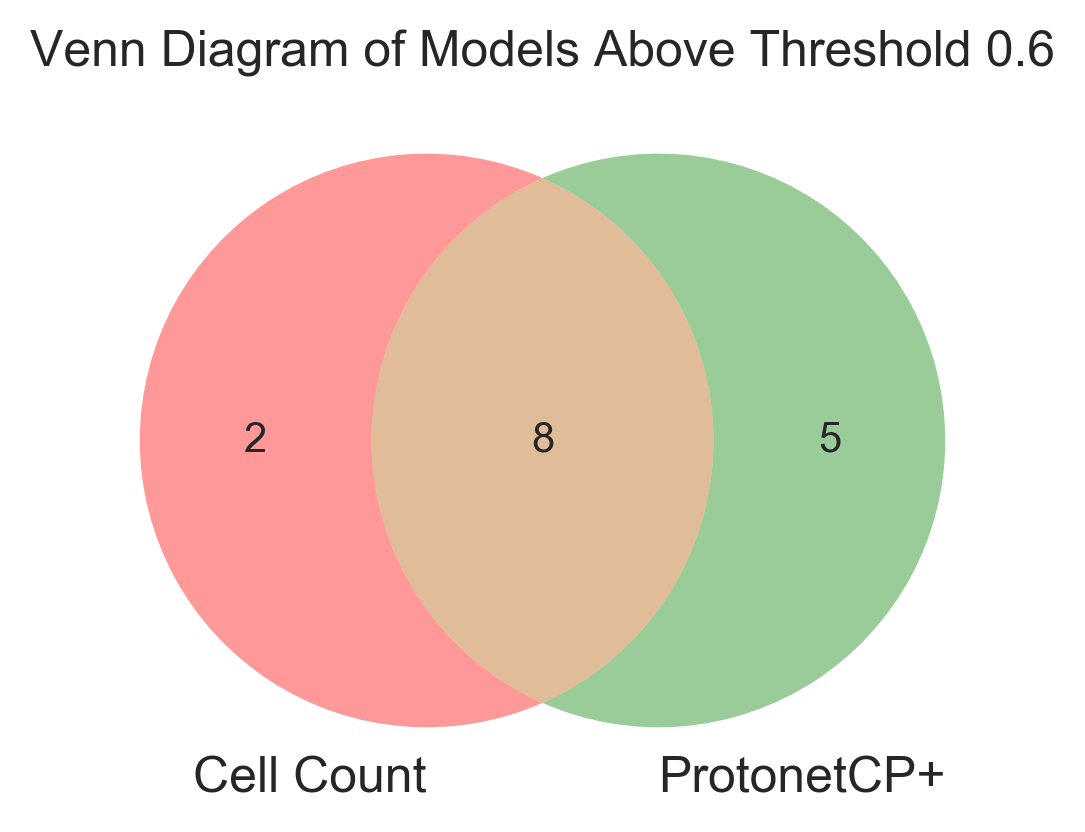

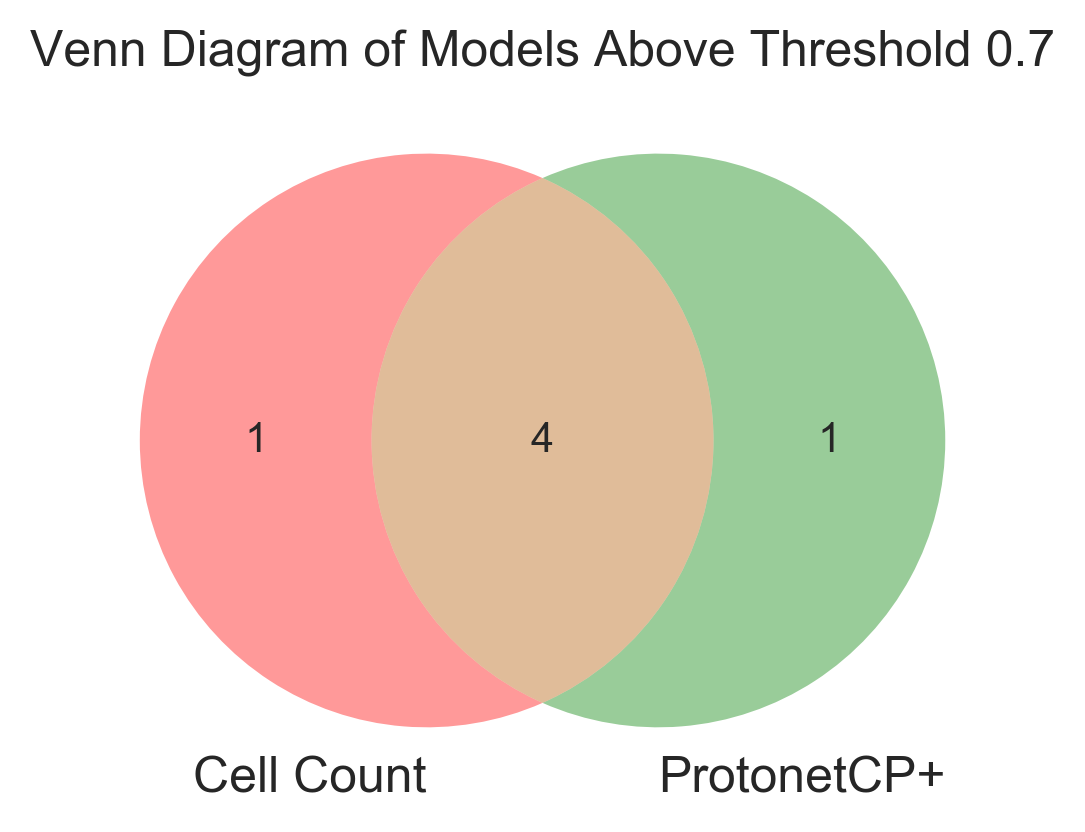

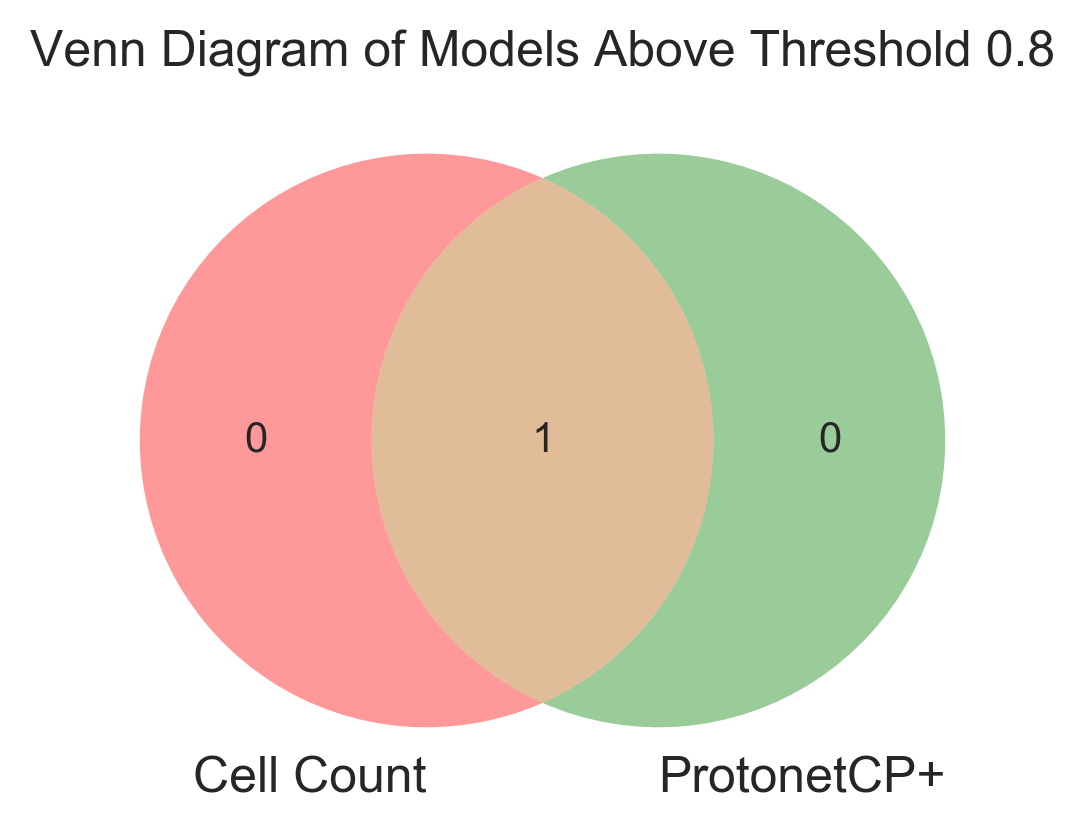

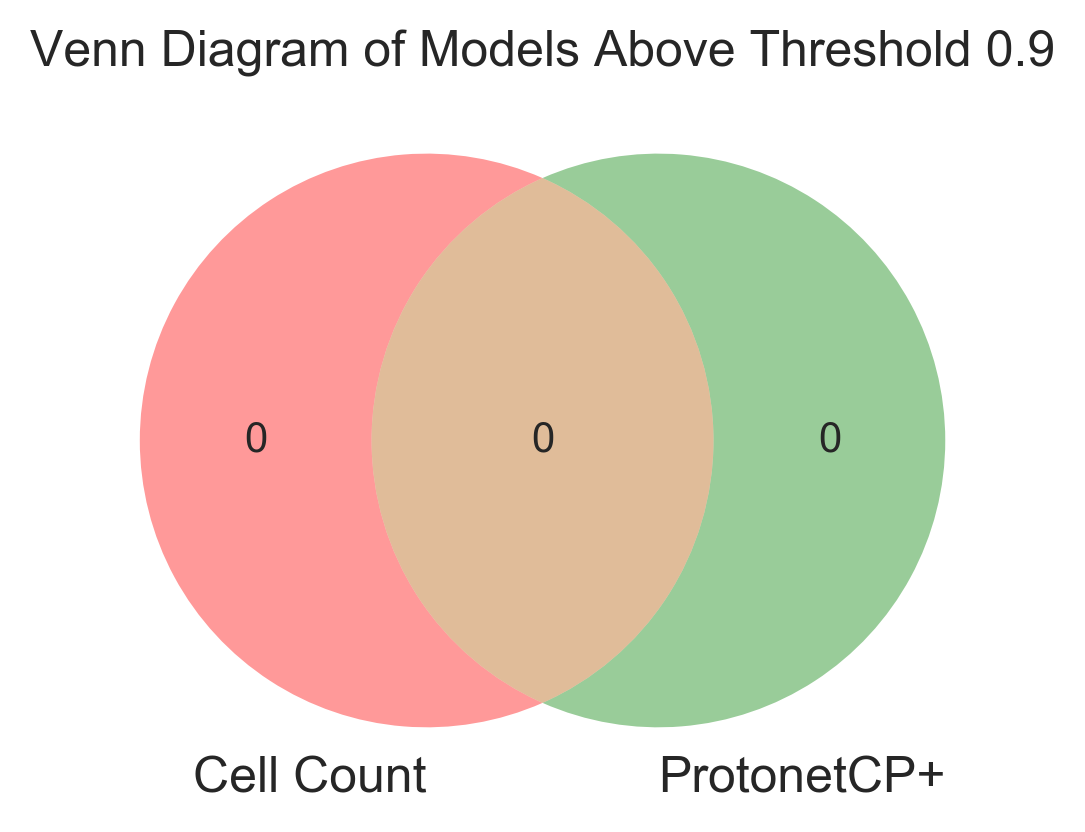

In [23]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2_unweighted



# Define threshold
threshold = 0.6

# Get sets of indices for each model where the values are above the threshold
cc_set = set(venndf.index[venndf['AUC_C'] > threshold])
pcp_set = set(venndf.index[venndf['ProtonetCP+'] > threshold])

# Create the Venn diagram
plt.figure(figsize=(4, 4), dpi=300)
venn2_unweighted([cc_set, pcp_set], ('Cell Count', 'ProtonetCP+'))
plt.title('Venn Diagram of Models Above Threshold 0.6')
plt.show()

# Define threshold
threshold = 0.7

# Get sets of indices for each model where the values are above the threshold
cc_set = set(venndf.index[venndf['AUC_C'] > threshold])
pcp_set = set(venndf.index[venndf['ProtonetCP+'] > threshold])

# Create the Venn diagram
plt.figure(figsize=(4, 4), dpi=300)
venn2_unweighted([cc_set, pcp_set], ('Cell Count', 'ProtonetCP+'))
plt.title('Venn Diagram of Models Above Threshold 0.7')
plt.show()


# Define threshold
threshold = 0.8

# Get sets of indices for each model where the values are above the threshold
cc_set = set(venndf.index[venndf['AUC_C'] > threshold])
pcp_set = set(venndf.index[venndf['ProtonetCP+'] > threshold])

# Create the Venn diagram
plt.figure(figsize=(4, 4), dpi=300)
venn2_unweighted([cc_set, pcp_set], ('Cell Count', 'ProtonetCP+'))
plt.title('Venn Diagram of Models Above Threshold 0.8')
plt.show()



# Define threshold
threshold = 0.9

# Get sets of indices for each model where the values are above the threshold
cc_set = set(venndf.index[venndf['AUC_C'] > threshold])
pcp_set = set(venndf.index[venndf['ProtonetCP+'] > threshold])

# Create the Venn diagram
plt.figure(figsize=(4, 4), dpi=300)
venn2_unweighted([cc_set, pcp_set], ('Cell Count', 'ProtonetCP+'))
plt.title('Venn Diagram of Models Above Threshold 0.9')
plt.show()
